In [1]:
from huggingface_hub import InferenceClient, login
import yaml

with open("secrets.yaml", "r") as f:
    secrets = yaml.safe_load(f)
login(token=secrets["hugging_face_token"])

c:\Users\domho\miniconda3\envs\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\domho\.cache\huggingface\token
Login successful


In [102]:
from pathlib import Path
import yaml


def model2filename(model):
    return model.split("/")[-1] + ".jpg"


def load_prompt(song_prompt):
    with open(song_prompt, "r") as f:
        data = yaml.safe_load(f)
    return data["response"]


image_model = "black-forest-labs/FLUX.1-dev"
client = InferenceClient(
    token=secrets["hugging_face_token"],
)
for song_prompt in Path("songs/image_prompts").glob("*.yaml"):
    with open(song_prompt, "r") as f:
        secrets = yaml.safe_load(f)
    image_folder = Path(f"songs/images/{song_prompt.stem}")
    image_folder.mkdir(parents=True, exist_ok=True)
    image_filename=(image_folder / model2filename(image_model))
    if image_filename.is_file():
        print(f"{song_prompt.stem} already generated with {image_model} --> skipping")
        continue
    prompt = load_prompt(song_prompt)
    img = client.text_to_image(
        prompt=prompt,
        height=512,
        width=512,
        model=image_model,
    )
    img.save(image_filename)
    break

The song depicts a somber and introspective scene where the narrator is expressing a sense of surrender and approaching the end of life. They ask their mother to remove their badge, symbolizing a loss of purpose or identity, and mention the darkness closing in. The repeated phrase about knocking on heaven's door conveys a feeling of longing for peace or the afterlife. The imagery could include elements like a darkening sky, a badge being removed, and a figure standing at a door that represents the threshold between life and the afterlife.


In [86]:
ret = client.text_to_image(
    prompt="""Create an illustration of a serene night scene featuring a starry sky over
  a tranquil landscape. Include a couple, a restless warrior and a wide-eyed wanderer,
  sharing a peaceful moment together, surrounded by nature's beauty. Emphasize a sense
  of calmness and love, with subtle hints of royalty and adventure in the background.
.""",
    height=512,
    width=512,
    model="black-forest-labs/FLUX.1-dev",
)

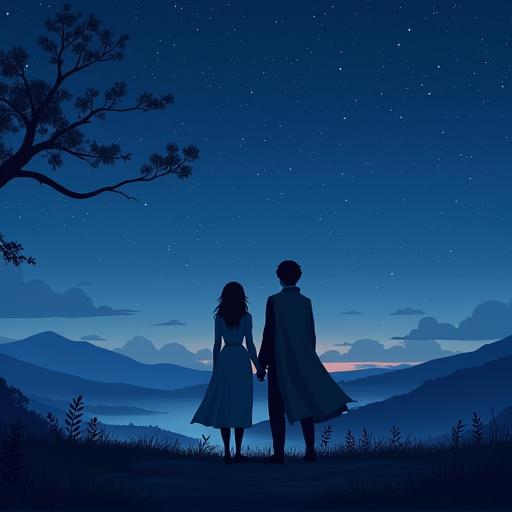

In [87]:
ret

In [88]:
ret.save("can_you_feel_the_love_tonight.jpg")

In [ ]:
"Please summarize the following song lyrics for a image generative AI to create an illustration of the song:"

In [70]:
from pathlib import Path
import re


def load_chordpro_file(filepath):
    # Read the file content
    with open(filepath, "r") as file:
        content = file.read()
    return content


def remove_chordpro_directives(content):
    # Remove ChordPro directives (anything inside curly or square brackets brackets)
    content = re.sub(r"\{.*?\}", "", content)
    content = re.sub(r"\[.*?\]", "", content)
    content = re.sub(r"[ ]+", " ", content)
    content = re.sub(r"\n{3,}", "\n\n", content)
    return content.strip()


songs = Path("songs/").glob("*.pro")
generated_prompts = [p.stem for p in Path("songs/image_prompts").glob("*.yaml")]

for song in Path("songs/").glob("*.pro"):
    if (song.stem) in generated_prompts:
        print(song.stem, "already generated --> skipping")
        continue
    song = load_chordpro_file(song)
    lyrics = remove_chordpro_directives(song)

Bob_Dylan-Knocking_On_Heavens_Door already generated --> skipping


In [62]:
response

ChatCompletion(id='chatcmpl-AEMLB7uBCNZVLONqCleE1dXqDL5xe', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The song depicts a somber and introspective scene where the narrator is expressing a sense of surrender and approaching the end of life. They ask their mother to remove their badge, symbolizing a loss of purpose or identity, and mention the darkness closing in. The repeated phrase about knocking on heaven's door conveys a feeling of longing for peace or the afterlife. The imagery could include elements like a darkening sky, a badge being removed, and a figure standing at a door that represents the threshold between life and the afterlife.", refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1727985833, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_f85bea6784', usage=CompletionUsage(completion_tokens=106, prompt_tokens=151, total_tokens=257, compl